Name : Hettihewa D.P.G.
Index no : 190231R

01)

In [14]:
import numpy as np
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'noicy point set')

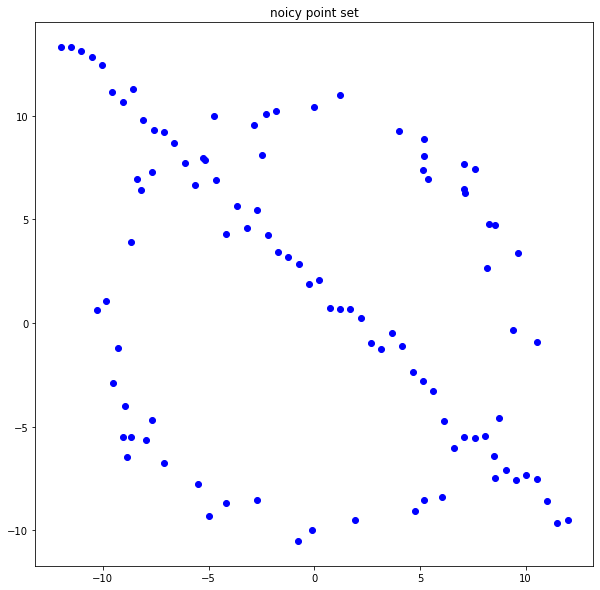

In [522]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import cv2 as cv
import circle_fit as cf
# np . random. seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r/16
T = np.random.uniform(0 , 2*np . pi , half_n )
n = s*np.random.randn( half_n )
x , y = (r + n)*np.cos(T), (r + n)*np.sin(T)
X_circ = np.hstack((x.reshape(half_n, 1 ), y.reshape( half_n , 1 )))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape (half_n , 1), y.reshape(half_n, 1)))
X = np.vstack((X_circ ,X_line))
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.plot(X[:, 0], X[:, 1], 'bo')
ax.set_title("noicy point set")



In [523]:
def get_circle(x1, y1, x2, y2, x3, y3) :
	B = (x1**2 + y1**2)*(y2-y3) + (x2**2+y2**2)*(y3-y1) + (x3**2 + y3**2)*(y1-y2)
	A = x1*(y2-y3) - y1*(x2-x3) + x2*y3 - x3*y2
	C = (x1**2 + y1**2)*(x2-x3) + (x2**2 + y2**2)*(x3-x1) + (x3**2 + y3**2)*(x1-x2)
	D = (x1**2 + y1**2)*(x3*y2-x2*y3) + (x2**2 + y2**2)*(x1*y3-x3*y1) + (x3**2+y3**2)*(x2*y1 - x1*y2)
	
	H = B/(2*A)
	K = -C/(2*A)
	R = np.sqrt((B**2 + C**2 - 4*A*D)/(4*(A**2)))
	

	return H, K, R
def calc_inlier(cx, cy, r):
    n = 0
    t = 1.96
    inliers = None
    for j in range(100):
        d = abs(((X[j, 0]- cx)**2 + (X[j, 1]- cy)**2)**0.5 - r)
        
       
        if d < t:
            n += 1
            if type(inliers) == type(None):
                inliers = np.array([X[j, :]])
            else:
                inliers = np.concatenate((inliers, X[j, :].reshape(1, -1)), axis = 0)
            
    return n, inliers




In [524]:
def RANSAC(X):
    s,  d, N = 3, 50, 35
    c1,c2 = 0,0
    nMax = 0
    bestInliers = []
    p_ = []
    for i in range(N):
        points = []
        while len(points) <3:
            p = X[np.random.randint(0, 100), :]
            while np.array_equal(p, x[-1]):
                    p = X[np.random.randint(0, 100), :]
                
            points.append(p)
        cx, cy, r =  get_circle(points[0][0], points[0][1], points[1][0], points[1][1], points[2][0], points[2][1])
        n, inliers = calc_inlier(cx, cy, r)
        if n > nMax:
            nmax = N
            bestInliers = inliers
            p_ = points
            bestFitCircle = plt.Circle((cx, cy), r, color = 'b', fill = False, label = "BestFit")
    if nMax < N:
        print("cannot find a suitable cicle")
    Cx, Cy, R, u = cf.least_squares_circle(bestInliers)
    
    ransacCircle = plt.Circle((Cx, Cy), R, color = 'm', fill = False, label = "Ransac")
    return bestInliers, ransacCircle, bestFitCircle, p_
    

cannot find a suitable cicle
[array([8.25953607, 4.80060111]), array([ 9.41381789, -0.31982531]), array([ 1.95351405, -9.51022852])]


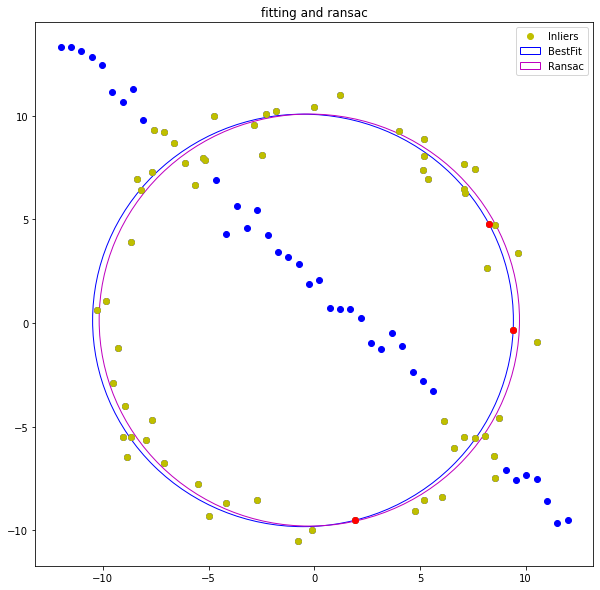

In [525]:
inliers, ransac, bestfit, P = RANSAC(X)
print(P)
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.plot(X[:, 0], X[:, 1], 'bo')
for point in inliers:
            if np.array_equal(point, inliers[-1]):
                ax.plot(point[0], point[1], 'yo', label="Inliers")
            else:
                ax.plot(point[0], point[1], 'yo')
for point in P:
        if np.array_equal(point, x[-1]):
            ax.plot(point[0], point[1], 'o', color = 'red', label="Best Sample")
        else:
            ax.plot(point[0], point[1], 'o', color = 'red')

ax.set_title("fitting and ransac")
ax.add_patch(bestfit)
ax.add_patch(ransac)
ax.legend(loc="upper right")

02)

In [6]:
corners = []
def click(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append([x,y])
    
img = cv.imread(r'./images/mini-futbol-sahasi-ozellikleri-ve-olculeri.jpg')
cv.imshow('image', img)
cv.setMouseCallback('image', click)
cv.waitKey(0)
cv.destroyAllWindows()

height, width = np.shape(img)[0],np.shape(img)[1]
zero_mat = np.array([[0],[0],[0]])

for i in range (4):
    for j in range (2):
        globals()[["x","y"][j]+"_dash_"+str(i+1)] = corners[i][j]

flg = cv.imread(r'./images/depositphotos_143113831-stock-photo-vector-illustration-of-manchester-united.jpg')
flg_height , flg_width = np.shape(flg)[0] , np.shape(flg)[1]

x1T = np.array([[0,0,1]])
x2T = np.array([[flg_width-1, 0,1]])
x3T = np.array([[flg_width-1, flg_height-1, 1]])
x4T = np.array([[0,flg_height-1,1]])


In [7]:
for i in range(4):
    a = np.concatenate((zero_mat.T,globals()["x"+str(i+1)+"T"], -globals()["y_dash_"+str(i+1)]*globals()["x"+str(i+1)+"T"]), axis=1)
    b = np.concatenate((globals()["x"+str(i+1)+"T"],zero_mat.T, -globals()["x_dash_"+str(i+1)]*globals()["x"+str(i+1)+"T"]), axis=1)
    if i==0:
        A=np.concatenate((a,b), axis=0, dtype = np.float64)
    else:
        A=np.concatenate((A,a,b), axis=0, dtype = np.float64)

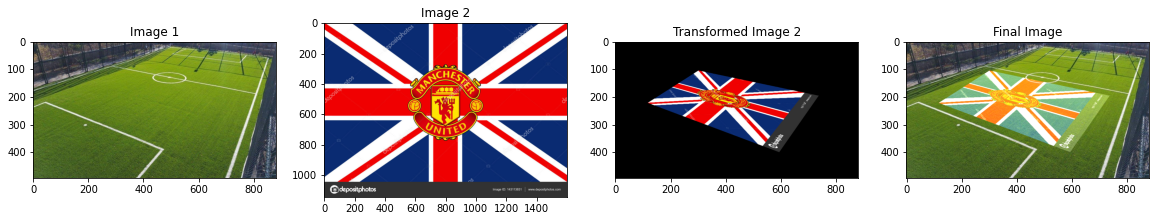

In [8]:
W,V = np.linalg.eig((A.T)@A)
temph = V[:, np.argmin(W)]
H = temph.reshape((3,3))
flg_tFormed = cv.warpPerspective(flg, H,(width,height))
output = cv.add(flg_tFormed,img)

fig, ax = plt.subplots(1,4,figsize=(20,20))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)) ; ax[0].set_title("Image 1")
ax[1].imshow(cv.cvtColor(flg, cv.COLOR_BGR2RGB)) ; ax[1].set_title("Image 2")
ax[2].imshow(cv.cvtColor(flg_tFormed, cv.COLOR_BGR2RGB)) ; ax[2].set_title("Transformed Image 2")
ax[3].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB)) ; ax[3].set_title("Final Image")
plt.show()

03

In [1]:
import numpy as np
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
%matplotlib inline

In [18]:
im1Original = cv.imread(r'./images/img1.ppm')
im5Original = cv.imread(r'./images/img5.ppm')

im1 = cv.cvtColor(im1Original, cv.COLOR_BGR2GRAY)
im2 = cv.cvtColor(cv.imread(r'./images/img2.ppm'), cv.COLOR_BGR2GRAY)
im3 = cv.cvtColor(cv.imread(r'./images/img3.ppm'), cv.COLOR_BGR2GRAY)
im4 = cv.cvtColor(cv.imread(r'./images/img4.ppm'), cv.COLOR_BGR2GRAY)
im5 = cv.cvtColor(im5Original, cv.COLOR_BGR2GRAY)

images = [im1, im2, im3, im4, im5]

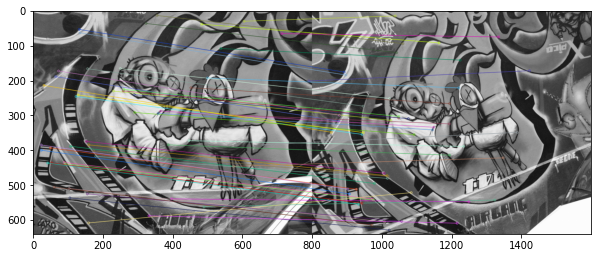

In [19]:
sift = cv.SIFT_create()
kp1, dc1 = sift.detectAndCompute(im1,None)
kp5, dc5 = sift.detectAndCompute(im5,None)
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(dc1,dc5)
matches = sorted(matches, key = lambda x:x.distance)
Matched = cv.drawMatches(im1, kp1, im5, kp5, matches[:50], im5, flags=2)
fig,ax = plt.subplots(figsize=(10,10))
ax.imshow(Matched)

In [20]:
def randN(n, t):
    l = np.random.randint(n, size=t)
    m = np.zeros(np.shape(l))
    
    for i in range(len(l)): m[i] = np.sum(l==l[i])
    if np.sum(m) == len(m): return l
    else: return randN(n,t)

In [21]:
def computeHomo(P1, P2):
    
    x1, y1, x2, y2, x3, y3, x4, y4 = P2[0], P2[1], P2[2], P2[3], P2[4], P2[5], P2[6], P2[7]
    x1T, x2T, x3T, x4T = P1[0], P1[1], P1[2], P1[3]
    zero_matrix = np.array([[0],[0],[0]])
    
    a = np.concatenate((zero_matrix.T,x1T, -y1*x1T), axis=1)
    b = np.concatenate((x1T,zero_matrix.T, -x1*x1T), axis=1)

    c = np.concatenate((zero_matrix.T,x2T, -y2*x2T), axis=1)
    d = np.concatenate((x2T,zero_matrix.T, -x2*x2T), axis=1)

    e = np.concatenate((zero_matrix.T,x3T, -y3*x3T), axis=1)
    f = np.concatenate((x3T,zero_matrix.T, -x3*x3T), axis=1)

    g = np.concatenate((zero_matrix.T,x4T, -y4*x4T), axis=1)
    h = np.concatenate((x4T,zero_matrix.T, -x4*x4T), axis=1)

    A = np.concatenate((a,b,c,d,e,f,g,h), axis=0, dtype = np.float64)


    A_transpose_times_A = (A.T)@A
    W,V = np.linalg.eig(A_transpose_times_A)
    temph = V[:, np.argmin(W)]
    H = temph.reshape((3,3))
    return H  

In [23]:
p,s,e = 0.99, 4, 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))

H_values = []
for t in range(4):
    sift = cv.SIFT_create()
    kp1, dc1 = sift.detectAndCompute(images[t],None)
    kp2, dc2 = sift.detectAndCompute(images[t+1],None)

    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

    matches = bf.match(dc1,dc2)
    matches = sorted(matches, key = lambda x:x.distance)

    list_kp1 = [kp1[mat.queryIdx].pt for mat in matches] 
    list_kp2 = [kp2[mat.trainIdx].pt for mat in matches]

    threshold, best_inliers, best_H = 2, 0, 0

    for k in range(N):
        four_random_points = randN(len(list_kp1)-1,4)

        fromPoints = []
        for i in range(4): fromPoints.append(np.array([[list_kp1[four_random_points[i]][0], list_kp1[four_random_points[i]][1], 1]]))

        toPoints = []
        for j in range(4): 
            toPoints.append(list_kp2[four_random_points[j]][0])
            toPoints.append(list_kp2[four_random_points[j]][1])
        
        H = computeHomo(fromPoints, toPoints)
        
        inliers = 0
        for i in range(len(list_kp1)):
            X = [list_kp1[i][0], list_kp1[i][1], 1]
            hX = H@X
            hX /= hX[-1]
            error = np.sqrt(np.power(hX[0]-list_kp2[i][0],2) + np.power(hX[1]-list_kp2[i][1],2))
            if error < threshold: inliers+=1
        
        if inliers > best_inliers:
            best_inliers = inliers
            best_H = H

    H_values.append(best_H)
H_1_to_5 = H_values[3] @ H_values

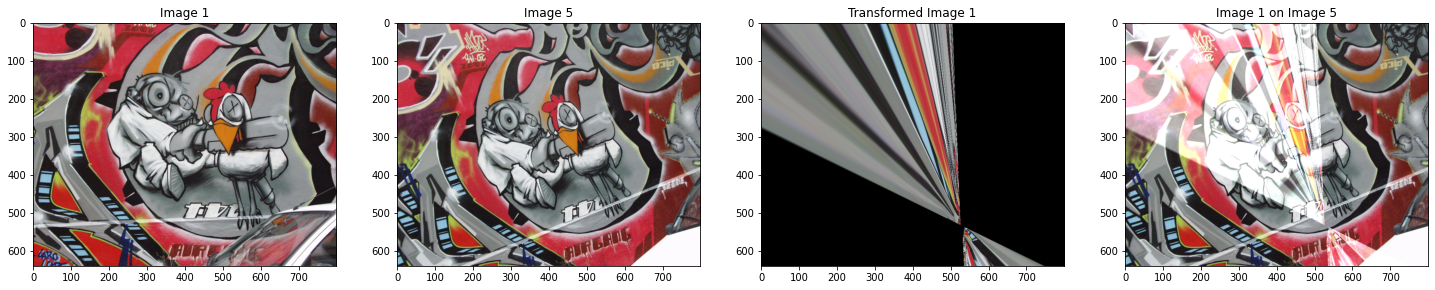

In [24]:
H_1_to_5 = H_values[3] @ H_values[2] @ H_values[1] @ H_values[0]
H_1_to_5 /= H_1_to_5[-1][-1]

transformed = cv.warpPerspective(im1Original, H_1_to_5 ,(np.shape(im5)[1] ,np.shape(im5Original)[0]))

fig, ax = plt.subplots(1,4,figsize=(25,25))
ax[0].imshow(cv.cvtColor(im1Original,cv.COLOR_BGR2RGB)) ; ax[0].set_title("Image 1")
ax[1].imshow(cv.cvtColor(im5Original,cv.COLOR_BGR2RGB)) ; ax[1].set_title("Image 5")
ax[2].imshow(cv.cvtColor(transformed, cv.COLOR_BGR2RGB)) ; ax[2].set_title("Transformed Image 1")
output = cv.add(im5Original,transformed)
ax[3].imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB)) ;  ax[3].set_title("Image 1 on Image 5")
plt.show()